<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [25]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное  - RM
2.   Равномерное - нет
3.   Биноминальное - NOX
4.   Бернулли - CHAS
5.   Геометрическое - DIS
6.   Логнормальное - LSTAT



AxesSubplot(0.125,0.125;0.775x0.755)


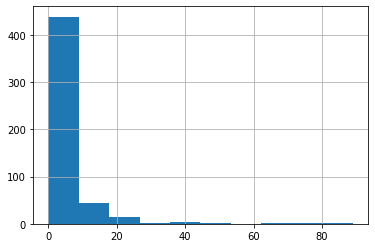

In [5]:
print(data.CRIM.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


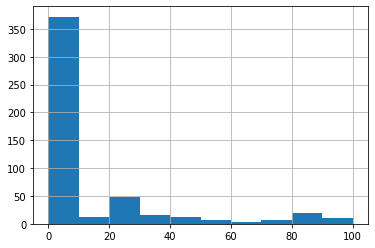

In [6]:
print(data.ZN.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


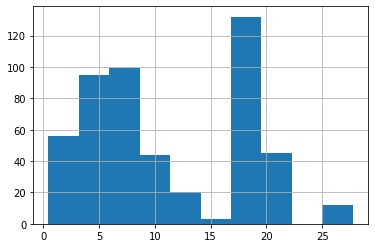

In [7]:
print(data.INDUS.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


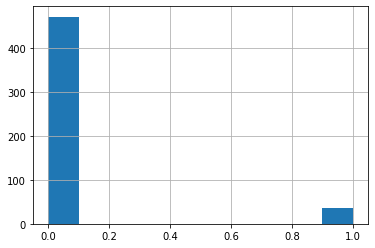

In [8]:
print(data.CHAS.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


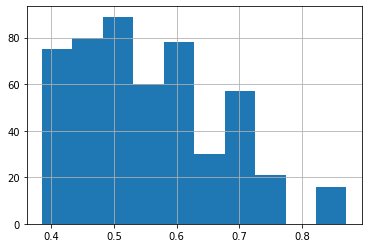

In [9]:
print(data.NOX.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


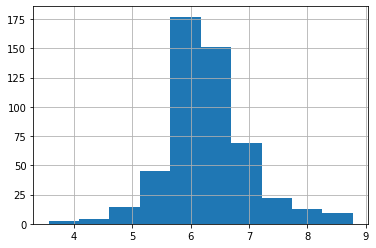

In [10]:
print(data.RM.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


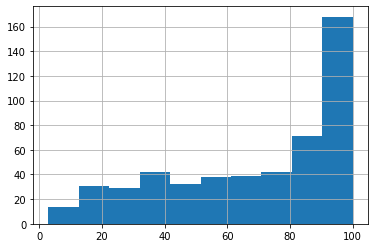

In [11]:
print(data.AGE.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


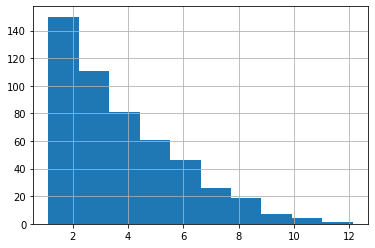

In [12]:
print(data.DIS.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


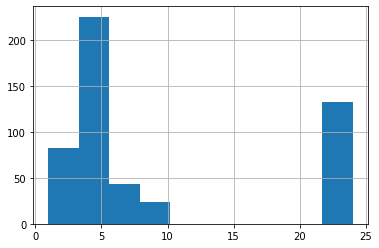

In [13]:
print(data.RAD.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


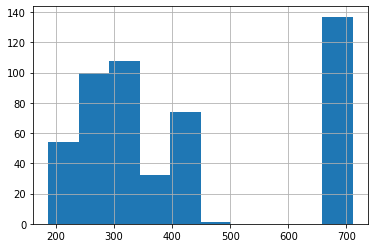

In [14]:
print(data.TAX.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


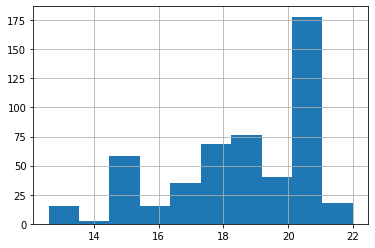

In [15]:
print(data.PTRATIO.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


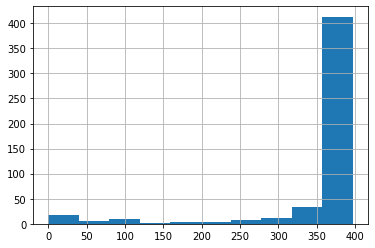

In [16]:
print(data.B.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


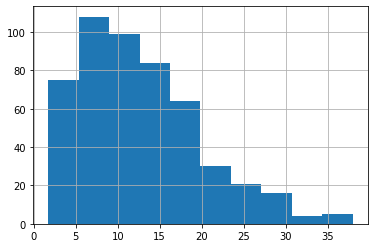

In [17]:
print(data.LSTAT.hist())

AxesSubplot(0.125,0.125;0.775x0.755)


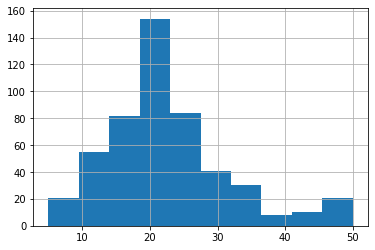

In [18]:
print(data.MEDV.hist())

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

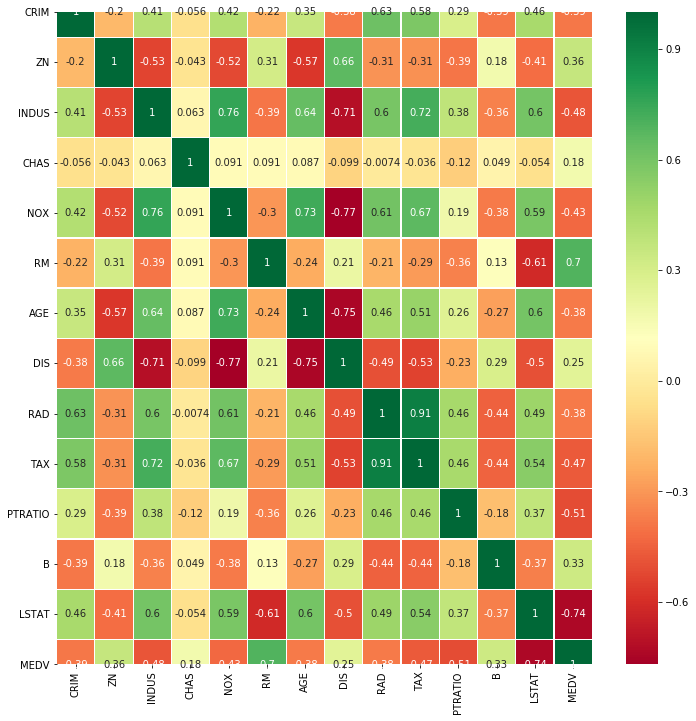

In [22]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()


у MEDV наблюдается прямая корреляция с количеством комнат (RM) и обратная с количеством низжих слоев населения (LSTAT)

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
LSTAT = np.array(data.LSTAT).reshape(-1,1)
MEDV = np.array(data.MEDV).reshape(-1,1)
model = LinearRegression()
# x = LSTAT,
# y = MEDV
X_train, X_test, y_train, y_test = train_test_split(
    LSTAT,
    MEDV,
    test_size = 0.2
)
model.fit(X_train, y_train)
print('Ошибка модели: ' + str(model.score(X_test, y_test)))

Ошибка модели: 0.48124758970392334


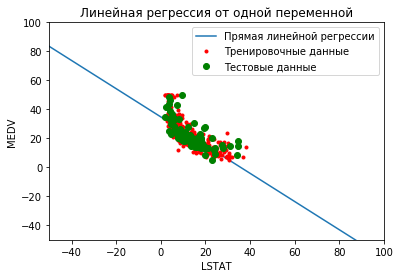

In [31]:
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 100, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-50,100)
plt.ylim(-50,100)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [32]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [34]:
data_new = data.iloc[:,1:]
np.round_(data_new.corr(), decimals=2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.00,0.54,0.49,0.52,0.82,0.55,0.19,0.50,0.81,0.82
SD of Ladder,0.54,1.00,0.09,0.62,0.60,0.25,0.26,0.39,0.63,0.61
Positive affect,0.49,0.09,1.00,0.39,0.39,0.68,0.21,0.35,0.30,0.33
Negative affect,0.52,0.62,0.39,1.00,0.62,0.43,0.16,0.34,0.54,0.49
Social support,0.82,0.60,0.39,0.62,1.00,0.45,0.12,0.44,0.77,0.74
Freedom,0.55,0.25,0.68,0.43,0.45,1.00,0.38,0.49,0.41,0.42
Corruption,0.19,0.26,0.21,0.16,0.12,0.38,1.00,0.27,0.20,0.12
Generosity,0.50,0.39,0.35,0.34,0.44,0.49,0.27,1.00,0.48,0.43
Log of GDP\nper capita,0.81,0.63,0.30,0.54,0.77,0.41,0.20,0.48,1.00,0.85
Healthy life\nexpectancy,0.82,0.61,0.33,0.49,0.74,0.42,0.12,0.43,0.85,1.00


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [37]:
print('в столбце Country ' + str(data['Country (region)'].isnull().sum()) + ' отсутствующих значений' )

в столбце Country 0 отсутствующих значений


Сколько стран в выборке? Написать ответ. 

In [39]:
print(str(len(data['Country (region)'].unique())) + ' стран в выборке' )

156 стран в выборке


Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

Чем лучше экономика страны, тем выше степень удовлетворенности жизнью, тк экономический уровень влияет на соц поддержку и уровень продолжительности жизни, от которых в большей степени зависит удовлетворенность. 

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

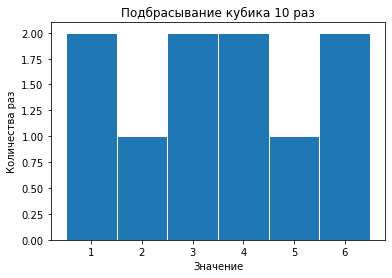

In [106]:
import pylab

# Количество испытаний
trials = 10

# Массив значений
values = np.random.randint(1, 7, size=trials)
pylab.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')

pylab.xlabel('Значение')
pylab.ylabel('Количества раз')
pylab.title('Подбрасывание кубика ' + str(trials) + ' раз')
pylab.show()

похоже на равномерное распределение

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

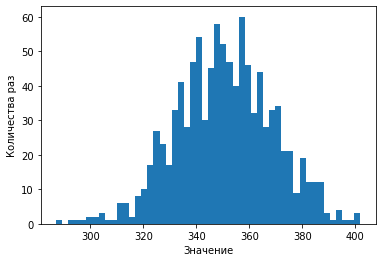

In [49]:
# Количество испытаний
trials = 100
number_of_sums = 1000
values = np.zeros([number_of_sums])
# Массив значений
for i in range(number_of_sums):
    values[i] = np.sum(np.random.randint(1, 7, size=trials))
pylab.hist(values, 50)
pylab.xlabel('Значение')
pylab.ylabel('Количества раз')
pylab.show()

Изменение произошло из-за реализации центральной предельной теоремы, так как у нас значительно возросло количество случайных величин.